**Table of contents**    
  - Libraries    
  - Loading the data    
  - Exploratory analysis    
    - Exploring relationships between endogenous variable and exogenous variables    
    - Exploring exogenous variables' distributions    
    - Correlation matrix    
    - Endogenous variable's normality assumption    
    - The "total" variable is normally distributed so it doesn't need any manipulation (e.g taking the natural log)    
  - Modeling part    
    - Partioning the data set    
    - Linear model formula    
    - Model prediction and evaluation metrics    
    - Prediction's residuals    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=1
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Libraries

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the data

#### The goal is to predict total car crashes based on other numerical variables

In [139]:
df = sns.load_dataset('car_crashes')

In [140]:
df.iloc[:,:-1] = df.iloc[:,:-1].map(lambda x: round(x,2))

In [141]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.33,5.64,18.05,15.04,784.55,145.08,AL
1,18.1,7.42,4.53,16.29,17.01,1053.48,133.93,AK
2,18.6,6.51,5.21,15.62,17.86,899.47,110.35,AZ
3,22.4,4.03,5.82,21.06,21.28,827.34,142.39,AR
4,12.0,4.20,3.36,10.92,10.68,878.41,165.63,CA


## Exploratory analysis

### Exploring relationships between endogenous variable and exogenous variables

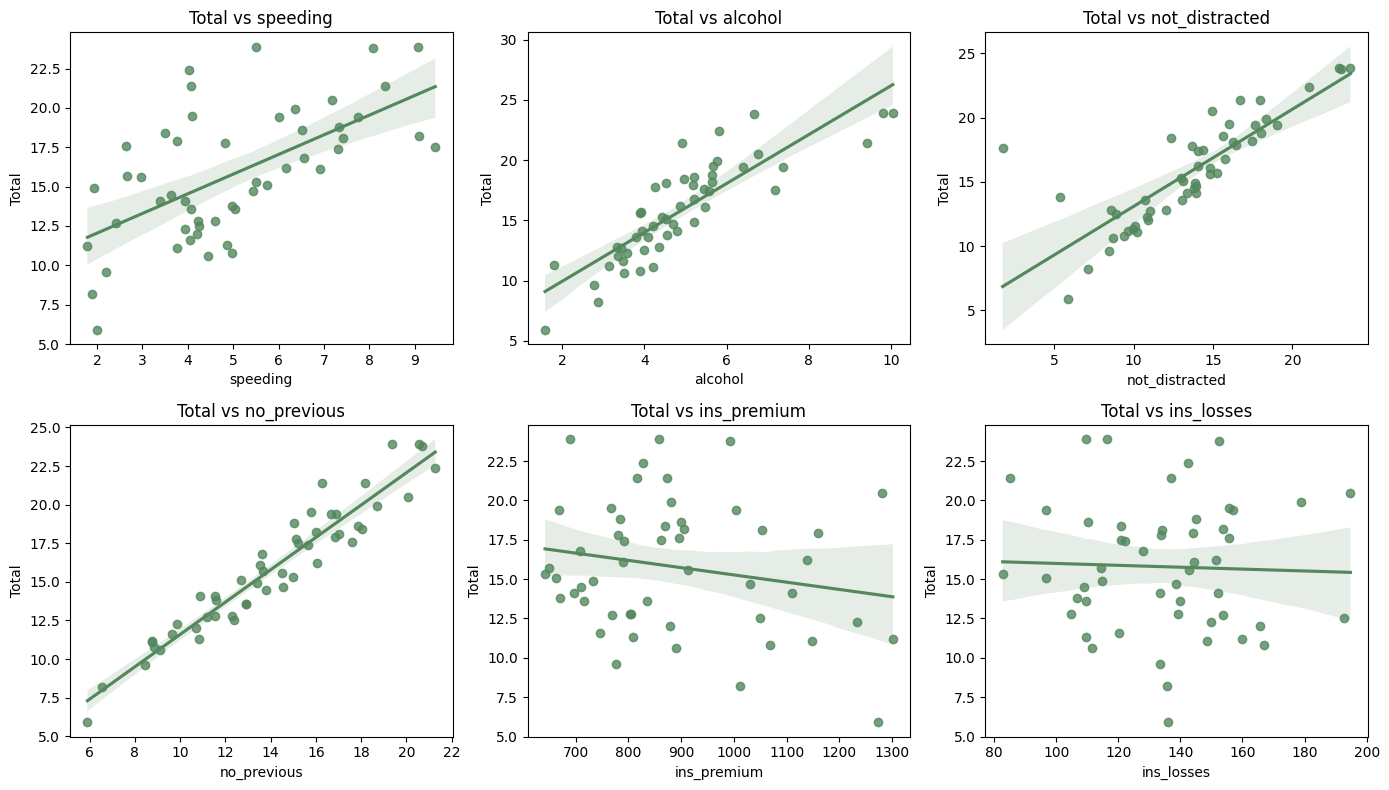

In [142]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (14,8))
axes = axes.flatten()

for ind, col in enumerate(df.select_dtypes(np.number).columns.to_list()[1:]):
    sns.regplot(data=df,x=col,y="total",ax = axes[ind],color="#53875d")
    axes[ind].set_title(f"Total vs {col}")
    axes[ind].set_xlabel(f"{col}")
    axes[ind].set_ylabel("Total")

plt.tight_layout()
plt.show()

### Exploring exogenous variables' distributions

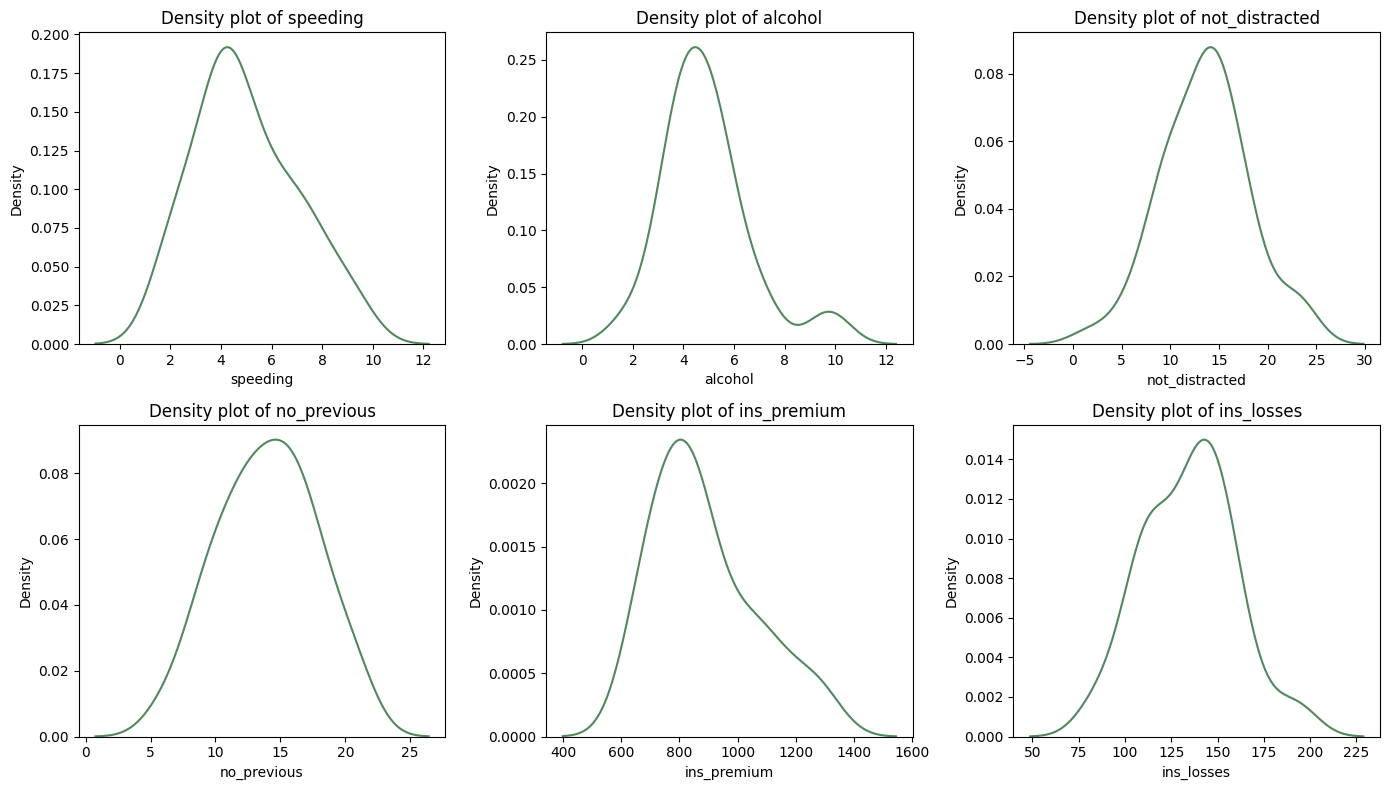

In [143]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (14,8))
axes = axes.flatten()

for ind, col in enumerate(df.select_dtypes(np.number).columns.to_list()[1:]):
    sns.kdeplot(data=df,x=col,ax = axes[ind],color="#53875d")
    axes[ind].set_title(f"Density plot of {col}")

plt.tight_layout()
plt.show()

### Correlation matrix

In [144]:
df.select_dtypes(np.number).corr().round(2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.00,0.61,0.85,0.83,0.96,-0.20,-0.04
speeding,0.61,1.00,0.67,0.59,0.57,-0.08,-0.07
alcohol,0.85,0.67,1.00,0.73,0.78,-0.17,-0.11
not_distracted,0.83,0.59,0.73,1.00,0.75,-0.18,-0.08
no_previous,0.96,0.57,0.78,0.75,1.00,-0.16,-0.01
ins_premium,-0.20,-0.08,-0.17,-0.18,-0.16,1.00,0.62
ins_losses,-0.04,-0.07,-0.11,-0.08,-0.01,0.62,1.00


In [145]:
df.shape

(51, 8)

### Endogenous variable's normality assumption

### The "total" variable is normally distributed so it doesn't need any manipulation (e.g taking the natural log)

In [147]:
shapiro(df['total'])

ShapiroResult(statistic=np.float64(0.9867447390482906), pvalue=np.float64(0.8353953363154043))

## Modeling part

### Partioning the data set

In [151]:
X = df.drop(["total","abbrev","ins_losses","speeding","ins_premium"],axis=1)
y = df["total"]
X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=123)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (30, 4)
X_test: (21, 4)
y_train: (30,)
y_test: (21,)


### Linear model formula

In [152]:
mod = sm.OLS(endog=y_train,exog=X_train).fit() #0.917

In [154]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     117.7
Date:                pt., 02 sie 2024   Prob (F-statistic):           3.00e-15
Time:                        15:47:02   Log-Likelihood:                -41.656
No. Observations:                  30   AIC:                             91.31
Df Residuals:                      26   BIC:                             96.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5807      0.953      1.

### Model prediction and evaluation metrics

In [156]:
mod_prediction = mod.predict(X_test)

#### MAE: 0.5808 means that the model was "wrong" by 0.5808 on average
#### MAPE: 0.0466 means that the model was "wrong" by 4.66% on average

In [158]:
print(f"MAE: {round(mean_absolute_error(y_true = y_test, y_pred = mod_prediction),4)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_true = y_test, y_pred = mod_prediction),4)}")

MAE: 0.5808
MAPE: 0.0466


### Prediction's residuals

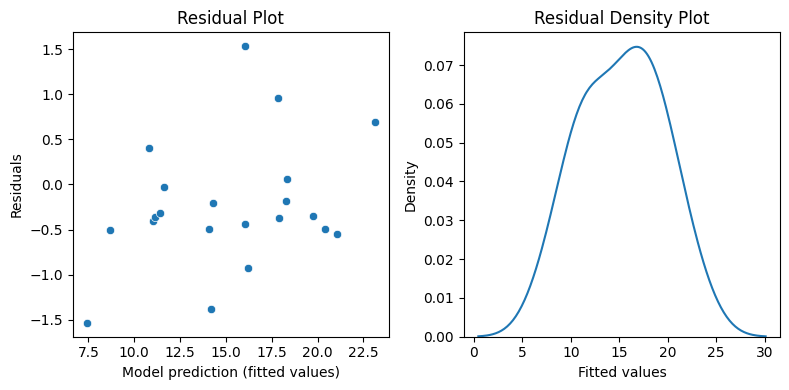

In [175]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (8,4))
axes = axes.flatten()

sns.scatterplot(x=mod_prediction,y=y_test-mod_prediction,ax=axes[0])
axes[0].set_xlabel("Model prediction (fitted values)")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot")

sns.kdeplot(data=mod_prediction,ax=axes[1])
axes[1].set_xlabel("Fitted values")
axes[1].set_title("Residual Density Plot")

plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

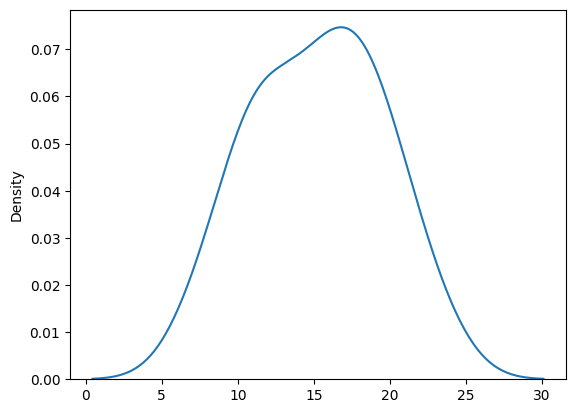

In [166]:
sns.kdeplot(data=mod_prediction)

In [167]:
shapiro(mod_prediction)

ShapiroResult(statistic=np.float64(0.9721981953340434), pvalue=np.float64(0.7810863483840443))